# Diabetes Prediction

## About Dataset

### Data Collection

The data consist of medical information, laboratory analysis… etc. The data that have been entered initially into the system are: No. of Patient, Sugar Level Blood, Age, Gender, Creatinine ratio(Cr), Body Mass Index (BMI), Urea, Cholesterol (Chol), Fasting lipid profile, including total, LDL, VLDL, Triglycerides(TG) and HDL Cholesterol , HBA1C, Class (the patient's diabetes disease class may be Diabetic, Non-Diabetic, or Predict-Diabetic)

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [64]:
data=pd.read_csv(r"dataset.csv",encoding='unicode_escape')

## Data Preprocessing

In [65]:
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         995 non-null    int64  
 1   No_Pation  995 non-null    int64  
 2   Gender     995 non-null    object 
 3   AGE        995 non-null    int64  
 4   Urea       995 non-null    float64
 5   Cr         995 non-null    int64  
 6   HbA1c      995 non-null    float64
 7   Chol       995 non-null    float64
 8   TG         995 non-null    float64
 9   HDL        995 non-null    float64
 10  LDL        995 non-null    float64
 11  VLDL       995 non-null    float64
 12  BMI        995 non-null    float64
 13  CLASS      995 non-null    object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.0+ KB


In [67]:
data.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,995.000000,9.950000e+02,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,340.314573,2.704370e+05,53.571859,5.118435,68.923618,8.282975,4.862332,2.352673,1.204975,2.610342,1.825025,29.557709
std,240.366618,3.389168e+06,8.729077,2.935102,60.126093,2.535472,1.301364,1.403779,0.661752,1.117462,3.621249,4.955155
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.500000,2.406450e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,301.000000,3.439500e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,549.500000,4.538250e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [68]:
data.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [69]:
data.duplicated().sum()

0

In [70]:
data = data.rename(columns={"No_Pation" : "No of patients", "AGE" : "Age", "CLASS" : "Class"})

In [71]:
data.head()

,ID,No of patients,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [72]:
class_mapping = {
    'N': 0,
    'N ':0,
    'Y': 1,
    'P': 0,
}
gender_mapping={'M':0,'F':1,'f':1}
data['Gender']=data['Gender'].replace(gender_mapping)
# Replace class labels with numerical values
data['Class'] = data['Class'].replace(class_mapping)

## Exploratory Data Analysis

### Age Distribution

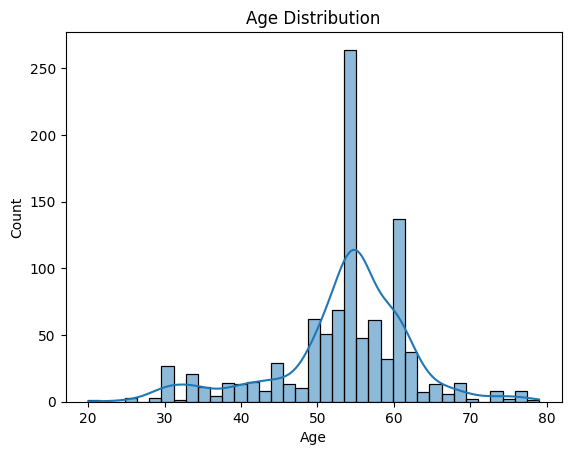

In [73]:
sns.histplot(data=data,x="Age",kde=True)
plt.title('Age Distribution')
plt.show()

In [74]:
data['Age'].unique()

array([50, 26, 33, 45, 48, 43, 32, 31, 30, 49, 42, 39, 41, 44, 47, 36, 38,
       46, 35, 40, 59, 51, 57, 63, 25, 60, 77, 54, 34, 55, 28, 56, 52, 69,
       73, 61, 58, 53, 66, 68, 62, 64, 67, 70, 79, 76, 65, 75, 20],
      dtype=int64)

In [75]:
bins=[10,20,30,40,50,60,70,80]
labels = ['10-20', '20-30', '30-40', '40-50','50-60','60-70','70-80']
data['AgeLevels']=pd.cut(data['Age'],bins=bins,labels=labels,right=False)
data

,ID,No of patients,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class,AgeLevels
0,502,17975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,50-60
1,735,34221,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0,20-30
2,420,47975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,50-60
3,680,87656,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,50-60
4,504,34223,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,194,454316,1,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,1,50-60
991,195,4543,1,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,1,50-60
992,196,454316,0,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,1,50-60
993,198,454316,0,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,1,20-30


In [76]:
data_Y=data[data['Class']==1]

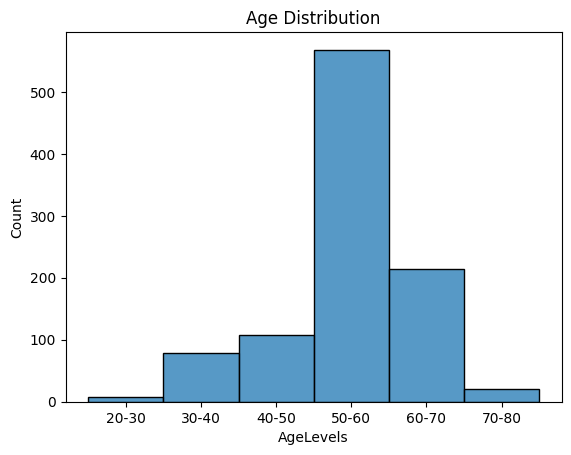

In [77]:
sns.histplot(data=data,x="AgeLevels")
plt.title('Age Distribution')
plt.show()

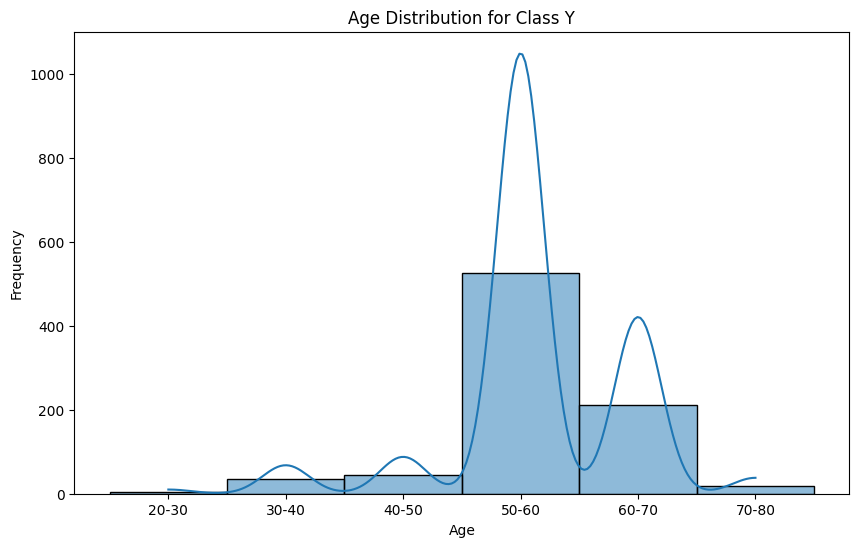

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(data_Y['AgeLevels'], kde=True, bins=10 ,color='#1f77b4')
plt.title('Age Distribution for Class Y')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [79]:
gender_mapping={0:'M',1:'F'}
data['Gender']=data['Gender'].replace(gender_mapping)
data

,ID,No of patients,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class,AgeLevels
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,50-60
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0,20-30
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,50-60
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,50-60
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,194,454316,F,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,1,50-60
991,195,4543,F,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,1,50-60
992,196,454316,M,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,1,50-60
993,198,454316,M,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,1,20-30


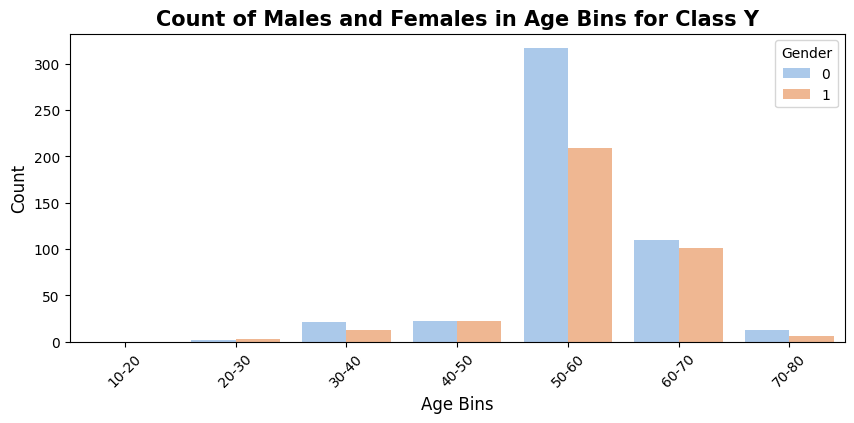

In [80]:
age_gender_counts = data_Y.groupby(['AgeLevels', 'Gender']).size().reset_index(name='Count')

# Plot the counts of each gender in each age bin
plt.figure(figsize=(10, 4))
sns.barplot(data=age_gender_counts, x='AgeLevels', y='Count', hue='Gender', palette='pastel')
plt.title('Count of Males and Females in Age Bins for Class Y', fontsize=15, fontweight='bold')
plt.xlabel('Age Bins', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Gender', fontsize=10)
plt.show()

In [81]:
bars=[0,3,6,9,12,15]
label = ['0-3','3-6','6-9','9-12','12-15']
data['HbA1cU']=pd.cut(data['HbA1c'],bins=bars,labels=label,right=False)

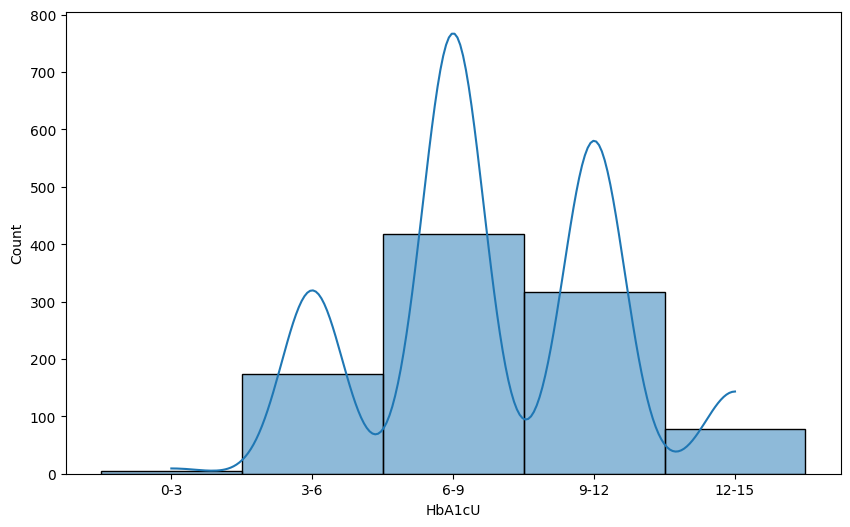

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(data['HbA1cU'], kde=True, bins=10 ,color='#1f77b4')

plt.show()

In [83]:
correlation = data['BMI'].corr(data['Class'])
print(f"Correlation between BMI and Class: {correlation}")

Correlation between BMI and Class: 0.5792610915562296


In [84]:
class_mapping = {
    0:'N',
    0:'N ',
    1:'Y',
    0:'P'
}
data['Class'] = data['Class'].replace(class_mapping)

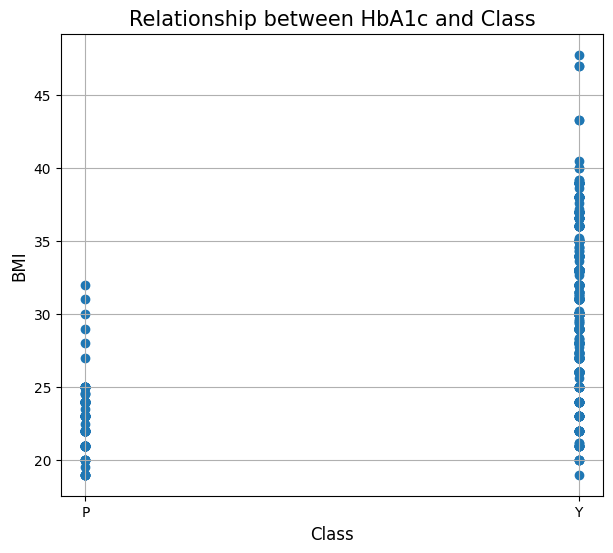

In [85]:
plt.figure(figsize=(7, 6))
plt.scatter(data['Class'], data['BMI'])
plt.xlabel('Class', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.title('Relationship between HbA1c and Class', fontsize=15)
plt.grid(True)
plt.show()

## Feature Engineering

In [86]:
data=pd.read_csv(r"dataset.csv",encoding='unicode_escape')
data = data.rename(columns={"No_Pation" : "No of patients", "AGE" : "Age", "CLASS" : "Class"})
class_mapping = {
    'N': 0,
    'N ':0,
    'Y': 1,
    'P': 0,
}
gender_mapping={'M':0,'F':1,'f':1}
data['Gender']=data['Gender'].replace(gender_mapping)
# Replace class labels with numerical values
data['Class'] = data['Class'].replace(class_mapping)

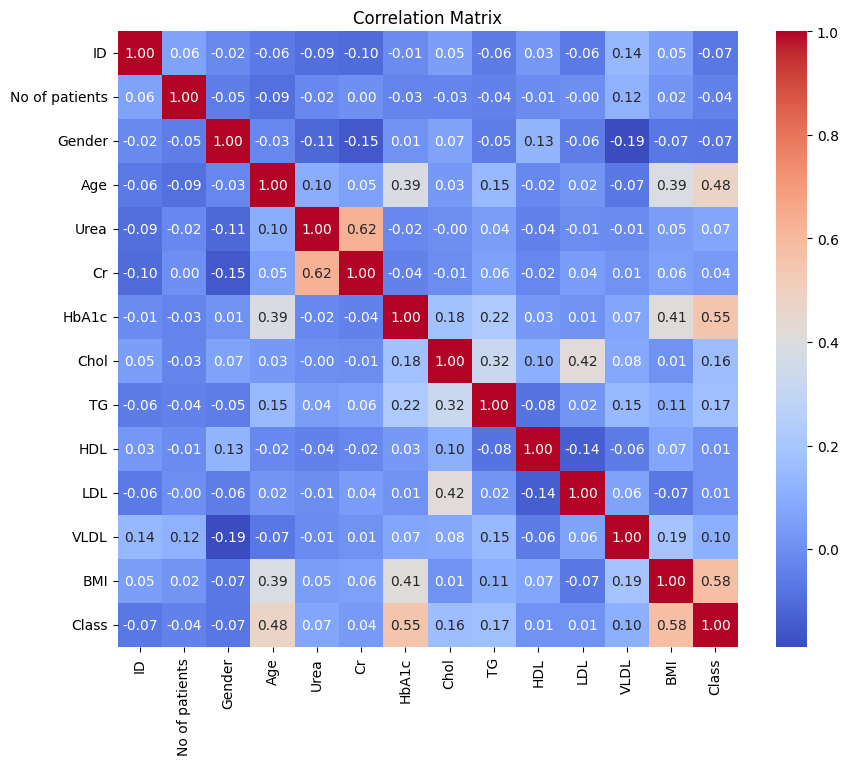

In [87]:
correlation=data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [88]:
predictors=data.drop(["Class",'ID','No of patients'], axis=1)
Target=data['Class']

In [89]:
data

,ID,No of patients,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,502,17975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,194,454316,1,57,4.1,70,9.3,5.3,3.3,1.0,1.4,1.3,29.0,1
991,195,4543,1,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,1
992,196,454316,0,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,1
993,198,454316,0,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,1


Mapping the outputs Diabetic as 1 and, Prediabetic and Not Diabtetic as 0

## Model Building

### Model Building using python packages

In [90]:
# predictors=predictors.values
scaler = StandardScaler()
X_scaled = predictors

X_train,X_test,Y_train,Y_test =train_test_split(X_scaled,Target,test_size=0.2,random_state=30)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Gaussian Naive Bayes and Logisitic regression Model

In [91]:
LR_Classifier = LogisticRegression(max_iter=1000)
LR_Classifier.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [111]:
LR_prediction=LR_Classifier.predict(X_test)

In [92]:
G_NaiveBayes = GaussianNB()
G_NaiveBayes.fit(X_train,Y_train)

GaussianNB()

In [94]:
GNB_prediction=G_NaiveBayes.predict(X_test)

In [120]:
print("The accuracy of Logistic Regression (Classifier) is "+str(round(metrics.accuracy_score(LR_prediction,Y_test)*100,3))+"%")

The accuracy of Logistic Regression (Classifier) is 93.467%


In [119]:
print("The accuracy of Normal Gaussian Naive Bayes Algorithm is "+str(round(metrics.accuracy_score(GNB_prediction,Y_test)*100,3))+"%")

The accuracy of Normal Gaussian Naive Bayes Algorithm is 92.462%


## Logistic Regression without Packages

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

class LogisticRegression():
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []
        self.accuracies = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Compute loss and store it
            loss = -(1 / n_samples) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            self.losses.append(loss)

            # Compute accuracy and store it
            y_pred = self.predict(X)
            accuracy = np.mean(y_pred == y)
            self.accuracies.append(accuracy)

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
        return np.array(class_pred)

    def plot_metrics(self):
        fig, ax1 = plt.subplots()

        color = 'tab:blue'
        ax1.set_xlabel('Iterations')
        ax1.set_ylabel('Loss', color=color)
        ax1.plot(range(self.n_iters), self.losses, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:red'
        ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
        ax2.plot(range(self.n_iters), self.accuracies, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.title('Loss and Accuracy during Training')
        plt.show()


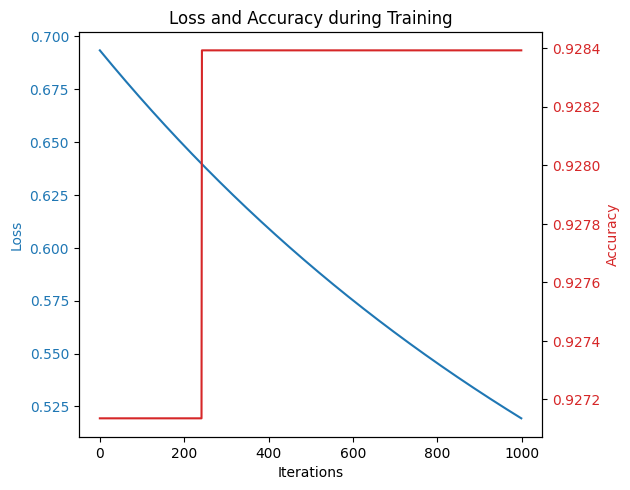

In [98]:
lr_model = LogisticRegression(lr=0.001)

scaler = StandardScaler()
X_scaled = predictors

X_train,X_test,Y_train,Y_test =train_test_split(X_scaled,Target,test_size=0.2,random_state=30)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Training model
lr_model.fit(X_train,Y_train)
lr_model.plot_metrics()

# Make predictions
y_pred_lr = lr_model.predict(X_test)

In [99]:
def accuracy(y_pred, y_test):
    return (np.sum(y_pred_lr==Y_test)/len(Y_test))*100
acc = accuracy(y_pred_lr, Y_test)

print(f'Accuracy of Logistic Regression implemeneted by us is {round(acc,2)} %')


Accuracy of Logistic Regression implemeneted by us is 91.46 %


### Gaussian Naive Bays without packages

In [100]:
class GaussianNB:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.mean = np.zeros((n_classes, n_features))
        self.var = np.zeros((n_classes, n_features))
        self.priors = np.zeros(n_classes)

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0)
            self.priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self.predict_row(x) for x in X]
        return np.array(y_pred)

    def pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict_row(self, row):
        posteriors = []
        for idx, c in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            posterior = np.sum(np.log(self.pdf(idx, row)))
            posterior = prior + posterior
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

In [101]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

In [102]:
def accuracy(y_pred_nb, y_test):
    return (np.sum(y_pred_nb==Y_test)/len(y_test))*100
acc = accuracy(y_pred_nb, Y_test)

print(f'Accuracy of Gaussian Regression implemeneted by us is {round(acc,2)} %')

Accuracy of Gaussian Regression implemeneted by us is 92.46 %


## Model Evaluation

In [103]:
print('Logistic Regression')
print(classification_report(LR_prediction,Y_test))

Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.95      0.97      0.96       166

    accuracy                           0.93       199
   macro avg       0.89      0.86      0.88       199
weighted avg       0.93      0.93      0.93       199



In [104]:
print('Gaussian Naive Bayes')
print(classification_report(GNB_prediction,Y_test))

Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.87      0.70      0.78        37
           1       0.93      0.98      0.95       162

    accuracy                           0.92       199
   macro avg       0.90      0.84      0.87       199
weighted avg       0.92      0.92      0.92       199



CONFUSION MATRIX OF LOGISTIC REGRESSION
Confusion Matrix:
           Predicted 0  Predicted 1
Actual 0           25            8
Actual 1            5          161


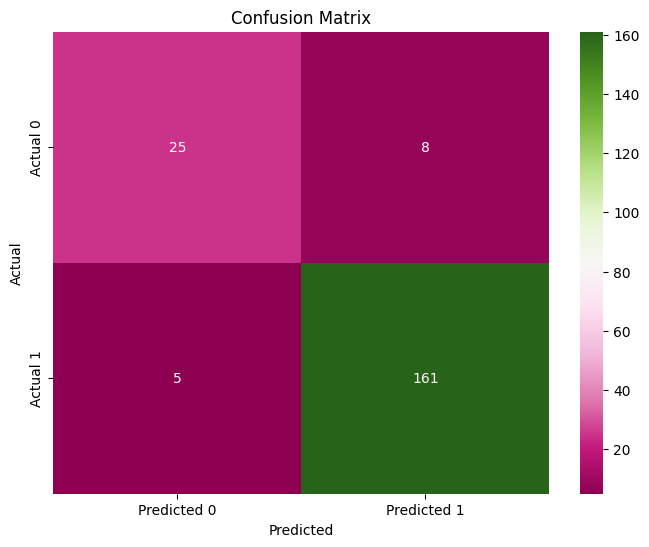

In [105]:
print('CONFUSION MATRIX OF LOGISTIC REGRESSION')
conf_matrix_lr = confusion_matrix(LR_prediction,Y_test)
conf_matrix_df = pd.DataFrame(conf_matrix_lr, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("Confusion Matrix:\n", conf_matrix_df)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='PiYG')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

CONFUSION MATRIX OF GAUSSIAN NAIVE BAYES
Confusion Matrix:
           Predicted 0  Predicted 1
Actual 0           26           11
Actual 1            4          158


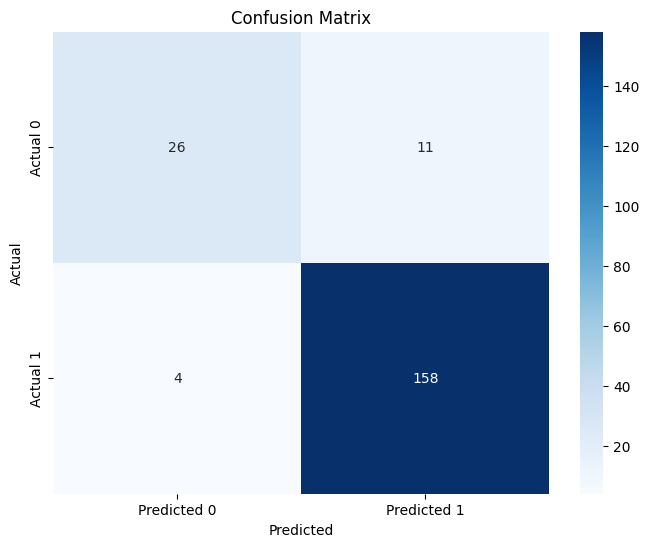

In [106]:
print('CONFUSION MATRIX OF GAUSSIAN NAIVE BAYES')
conf_matrix_gnb = confusion_matrix(GNB_prediction, Y_test)
conf_matrix_df = pd.DataFrame(conf_matrix_gnb, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("Confusion Matrix:\n", conf_matrix_df)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [107]:
print(classification_report(y_pred_lr, Y_test))

              precision    recall  f1-score   support

           0       0.97      0.64      0.77        45
           1       0.91      0.99      0.95       154

    accuracy                           0.91       199
   macro avg       0.94      0.82      0.86       199
weighted avg       0.92      0.91      0.91       199



Confusion Matrix:
           Predicted 0  Predicted 1
Actual 0           29           16
Actual 1            1          153


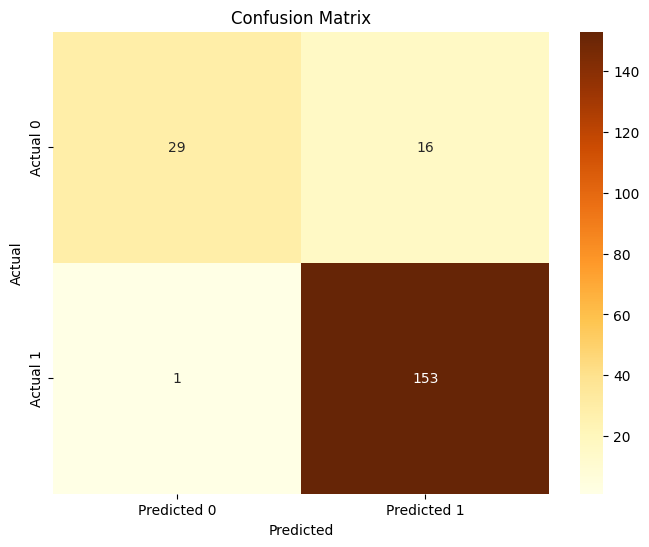

In [108]:
conf_matrix = confusion_matrix(y_pred_lr, Y_test)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("Confusion Matrix:\n", conf_matrix_df)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [109]:
print(classification_report(y_pred_nb, Y_test))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78        37
           1       0.93      0.98      0.95       162

    accuracy                           0.92       199
   macro avg       0.90      0.84      0.87       199
weighted avg       0.92      0.92      0.92       199



Confusion Matrix:
           Predicted 0  Predicted 1
Actual 0           26           11
Actual 1            4          158


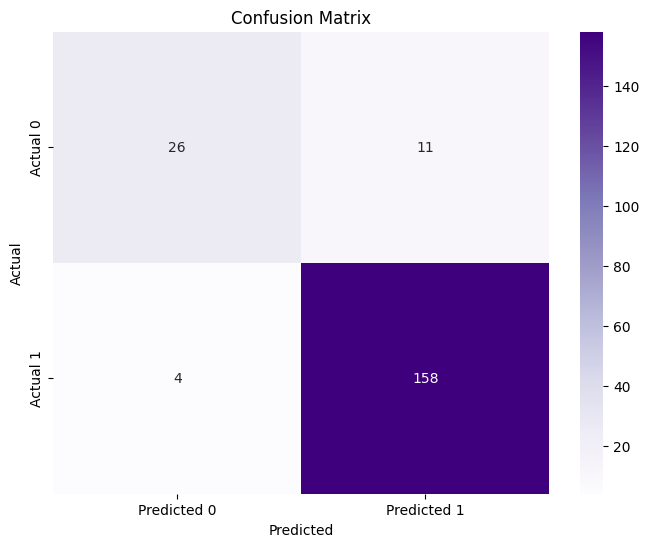

In [110]:
conf_matrix = confusion_matrix(y_pred_nb, Y_test)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("Confusion Matrix:\n", conf_matrix_df)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()